# Basic Data Visualizations
This module shows a few different techniques for retreiving and visualizing data using pandas and matplotlib. We will also work with the original cars dataset. You will need to add that dataset to your notebook for some of these examples to work.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

To retreive some data to work with, you'll use a library called `pandas_datreader`, which allows you to connect to multiple external datasources. The documentation is here: [https://pydata.github.io/pandas-datareader/#](http://) 

To install the library in your server, use the `pip` tool. Open a terminal session on your server (It is in the Launcher tab. You may need to start a new Launcher from the File menu.). In the terminal session type: `pip install pandas-datareader`.

In [3]:
import pandas_datareader.data as web

You will need the matplotlib library so that we can make charts. It is common practice to import it **as** `plt` - that's fewer characters to type, every time you want to access the functions. You also import `datetime`, to provide useful functions for working with dates (like getting the current time).


In [4]:
import matplotlib.pyplot as plt
import datetime as dt

Next you'll retrieve stock tickers as an easy-to-access source of data to practice with. Then create a list to store the stock tickers.

In [5]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL'] #, 'MSFT', 'IBM'] (you can add more tickers as a list)

# We would like all available data from 01/01/2017 until 12/31/2017.
start_date = '2017-01-01' # you can set this to whatever date you want
end_date = dt.datetime.now() # this puts the current time into a variable called end_date

# This next function creates a pandas dataframe containing the results of the DataReader query
# The 'yahoo' datasource provides the stock ticker info. (google and morningstar no longer work).
# The results are stored as a dataframe called df (nice and short!)
df = web.DataReader(tickers, data_source='yahoo', start=start_date, end=end_date)

# Inspect the first 5 rows
df.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-11-05,118.824997,119.029999,119.620003,116.870003,117.949997,126387100.0
2020-11-06,118.690002,118.690002,119.199997,116.129997,118.320000,114457900.0
2020-11-09,116.320000,116.320000,121.989998,116.050003,120.500000,154515300.0
2020-11-10,115.970001,115.970001,117.589996,114.129997,115.550003,137656000.0
2020-11-11,119.235001,119.235001,119.559998,116.440002,117.190002,78040995.0


Now for the first visualization! You use the matplotlib library's plot function to access a basic line graph. It can take many paramenters, but it needs at least the data to work with and plot on the y-axis, which can be requested from the column headings you just retrieved into the new dataframe. You can plot the low closing value from the 'Low' coumn, for example.

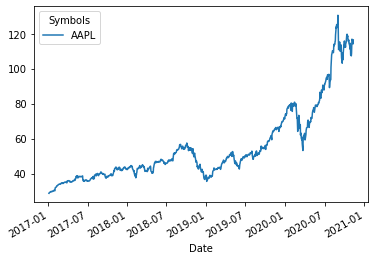

In [6]:
df.plot(y='Low') 

Plotting multiple values is easy. Just specify which columns of the dataframe you want to plot.

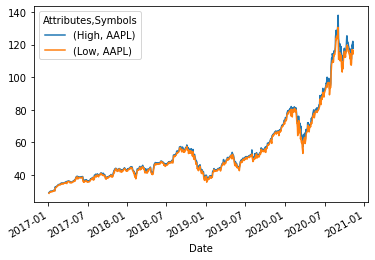

In [7]:
df[["High", "Low"]].plot()

You can also change the aesthetics of the plot to meet your. There are a lot of pre-set styles that you can choose from (easiest) or you can make your own by modifying specific parameters of the plot function (harder). To list the available styles, use the `style.available` function.

In [8]:
plt.style.available

['seaborn-poster',
 'seaborn',
 'seaborn-dark',
 'fast',
 'dark_background',
 'seaborn-notebook',
 'seaborn-talk',
 'seaborn-paper',
 'grayscale',
 'Solarize_Light2',
 'fivethirtyeight',
 'tableau-colorblind10',
 '_classic_test',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn-pastel',
 'seaborn-dark-palette',
 'bmh',
 'ggplot',
 'seaborn-whitegrid',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-deep',
 'seaborn-bright',
 'classic',
 'seaborn-darkgrid']

To use a specific style, call the `style.use` function and set the parameter to the name of the style you want. You need to call this function every time you want to change the style.

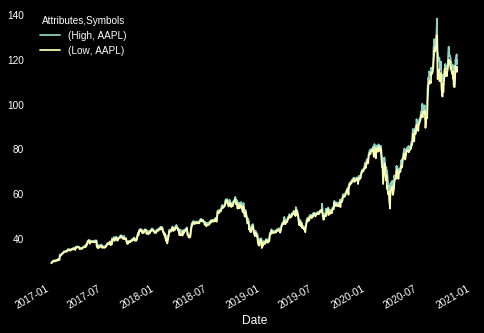

In [16]:
plt.style.use("dark_background") #need to reset this every time you want to change the template
df[["High", "Low"]].plot()

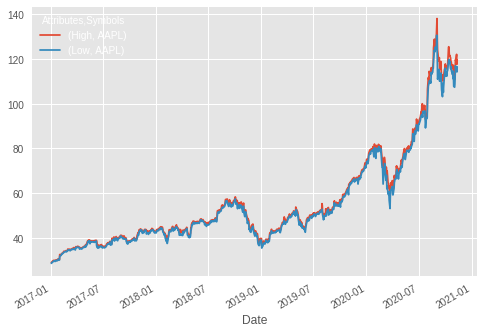

In [17]:
plt.style.use("ggplot")
df[["High", "Low"]].plot()

## Bar Charts
You can also easily plot bar charts usling matplotlib. Bar charts are good representations for ranking categorical and nominal data. This example uses Google stock data to create categories of how many closing days were Poor, Good, or Stellar, depending on how they compare to the avarage closing value over the whole time period.

Suppose you want to answer the question: *"How many closing stock prices were low medium or high compared to the average closing price?"*

To do this, you need to know the average price over that time period and to create three categories for the closing values, compared to that average. You can use python to create categories of data from the stock prices. 

First get stock prices for Google (over the same time period as above).

Then calculate what the average (mean) price was over that time period.

In [18]:
google = web.DataReader('GOOG', data_source='yahoo', start=start_date, end=end_date)

google['Close'].mean()

1156.1233284020104

In [19]:
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,789.630005,775.799988,778.809998,786.140015,1657300,786.140015
2017-01-04,791.340027,783.159973,788.359985,786.900024,1073000,786.900024
2017-01-05,794.479980,785.020020,786.080017,794.020020,1335200,794.020020
2017-01-06,807.900024,792.203979,795.260010,806.150024,1640200,806.150024
2017-01-09,809.966003,802.830017,806.400024,806.650024,1274600,806.650024
...,...,...,...,...,...,...
2020-11-05,1793.640015,1750.510010,1781.000000,1763.369995,2065800,1763.369995
2020-11-06,1772.430054,1740.349976,1753.949951,1761.750000,1660900,1761.750000
2020-11-09,1818.060059,1760.020020,1790.900024,1763.000000,2268300,1763.000000


You can use the mean price over that period to create three categories – depending upon whether the closing price on a day was lower, near it or above it.

To do this create a function that you use to evaluate each price and set it's **rank performace**. You will pass this function the price on each row of the dataframe

In [12]:
def rank_performance(stock_price):
    if stock_price <= 900:
        return "Poor"
    elif stock_price>900 and stock_price <=1200:
        return "Good"
    elif stock_price>1200:
        return "Stellar"

You then run this custom function against each of the values in the **Close** column.

In [13]:
google['Close'].apply(rank_performance)

Date
2017-01-03       Poor
2017-01-04       Poor
2017-01-05       Poor
2017-01-06       Poor
2017-01-09       Poor
               ...   
2020-10-26    Stellar
2020-10-27    Stellar
2020-10-28    Stellar
2020-10-29    Stellar
2020-10-30    Stellar
Name: Close, Length: 965, dtype: object

Note that the values haven't actually changed in the resulting data - you've simply stored the ranking for each value in the Close column in the datareader object. To show the data hasn't changed, just view the object:

In [14]:
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,789.630005,775.799988,778.809998,786.140015,1657300,786.140015
2017-01-04,791.340027,783.159973,788.359985,786.900024,1073000,786.900024
2017-01-05,794.479980,785.020020,786.080017,794.020020,1335200,794.020020
2017-01-06,807.900024,792.203979,795.260010,806.150024,1640200,806.150024
2017-01-09,809.966003,802.830017,806.400024,806.650024,1274600,806.650024
...,...,...,...,...,...,...
2020-10-26,1638.239990,1576.500000,1625.010010,1590.449951,1853300,1590.449951
2020-10-27,1606.844971,1582.780029,1595.670044,1604.260010,1229000,1604.260010
2020-10-28,1561.349976,1514.619995,1559.739990,1516.619995,1834000,1516.619995


To finally create the bar chart of categories, you need to count how many times each ranking occurred. Conveninetly, the `value_counts()` function does this. If you use dot "." notation to append this function to the other ones, you don't have to create an intermediate variable to store the counts. You can just pass along the results right on to the `.plot()` function. In this way, you are concatenating the results of each step with the "dot" notation. Note the `kind` parameter sets it to a bar chart.

*get coogle 'Close' . -> apply the rank performance function . -> count the results . -> plot the results*

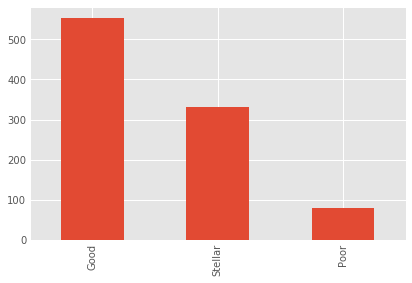

In [15]:
google['Close'].apply(rank_performance).value_counts().plot(kind="bar")

If for some reason, you wanted a horizontal bar chart, just set the `kind` parameter to `"barh"`.

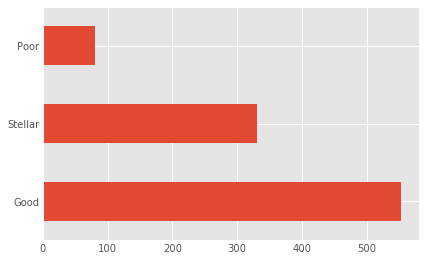

In [16]:
google["Close"].apply(rank_performance).value_counts().plot(kind="barh")

## Pie Charts
It is similarly easy to plot categories with a pie cahrt, to create a part-to-whole comparison.

First you load the results of the `DataReader` into a new variable to work with. Let's take Johnson & Johnson for example.

In [17]:
jnj = web.DataReader('JNJ', data_source='yahoo', start='2016-01-01', end=dt.datetime.now())
jnj.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,101.809998,99.449997,101.709999,100.480003,12722800.0,88.409317
2016-01-05,101.440002,100.570000,100.580002,100.900002,6467200.0,88.778877
2016-01-06,100.970001,99.599998,99.820000,100.389999,7733800.0,88.330139
2016-01-07,100.089996,98.879997,99.309998,99.220001,9433100.0,87.300682
2016-01-08,99.940002,97.849998,99.879997,98.160004,9766700.0,86.368034


How did performance each day compare to its average?
First let's find out the average:

In [18]:
jnj['Close'].mean()

130.84644215441963

We can write another custom performance to determine whether each value is above or below the average score over this time period.

In [19]:
def above_or_below(stock_price):
    if stock_price >= 128.33:
        return "Above average"
    else:
        return "Below average"

You can then create a pie based upon the values for the results of your custom function. Note the styling choices in this example. A full list of the styling parameters is in the matplotlib documentation. [https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pie.html](http://)

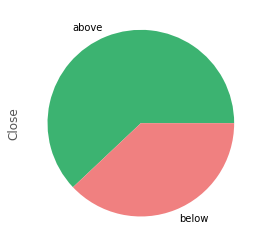

In [20]:
labels='above','below'
colors = ['mediumseagreen','lightcoral'] 
jnj["Close"].apply(above_or_below).value_counts().plot(kind='pie', legend=False, labels=labels, colors=colors)

## Scatter Plots

Scatterplots require at least two columns of data, because you need to specify which axes to compare. To try out these examples, you need my `original cars.csv` dataset, on Kaggle. `read_csv()` function to create a dataframe from the file.

In [115]:
cars = pd.read_csv("data_cars_2004.csv")
cars # show the head and tail of this file

,Vehicle Name,Sedan,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,0,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Volvo S80 2.9 4dr,1,0,0,0,0,0,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,Volvo S80 T6 4dr,1,0,0,0,0,0,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,Volvo V40,0,0,0,1,0,0,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,Volvo XC70,0,0,0,1,0,0,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73


To show what a generic scatterplot might look like you can create a bunch of random points and make them have random weights.

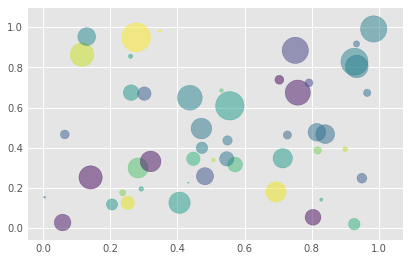

In [22]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
size = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=size, c=colors, alpha=0.5)
plt.show()

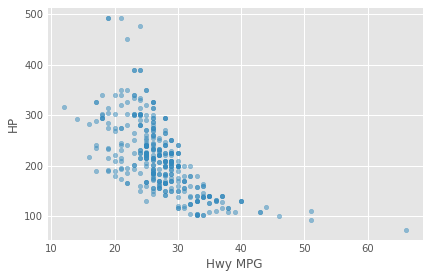

In [23]:
x=cars[['Hwy MPG']]
y=cars[['HP']]
cars[['Hwy MPG','HP']].plot(kind='scatter', x='Hwy MPG', y='HP', alpha=0.5)

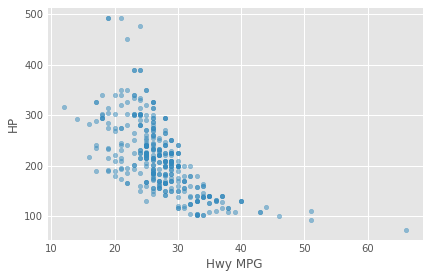

In [24]:
cars[['Hwy MPG','HP']].plot(kind='scatter',x='Hwy MPG', y='HP',  alpha=0.5)

You can access the `size` parameter to change how big the dots are. And the `figsize` to adjust how big the graph is.

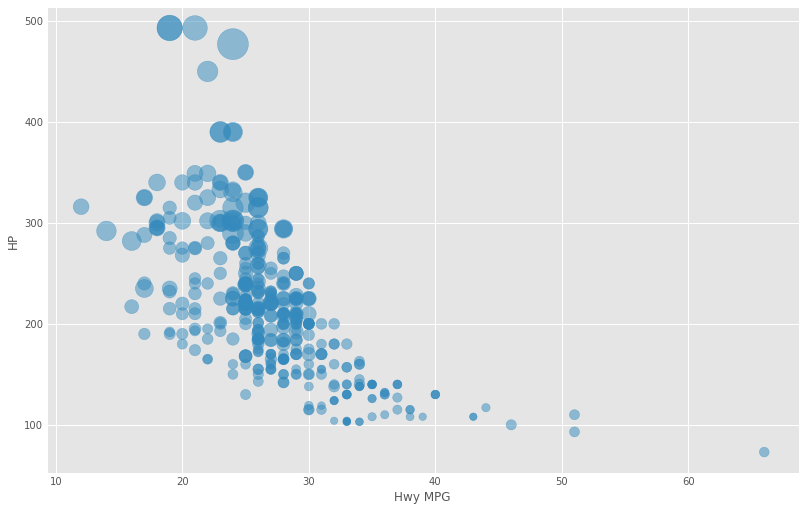

In [25]:
#list(cars)
size=cars[['Retail Price']]  # we can use the size parameter to set the size of the marks
cars[['Hwy MPG','HP']].plot(kind='scatter', x='Hwy MPG', y='HP', alpha=0.5, s=size*.005, figsize=(12,8))

## Distributions
You can easily plot the distribution of values in an axis (i.e., column) using the matplotlib `hist()` function. You can specify a list of only the columsnb

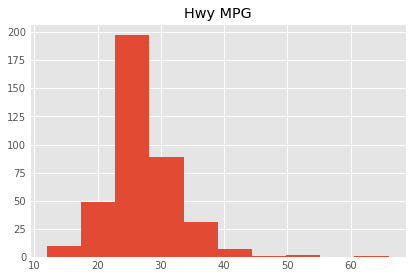

In [26]:
hist=cars.hist(column='Hwy MPG')

You can plot several columns by passing a list to the `column` paramater.

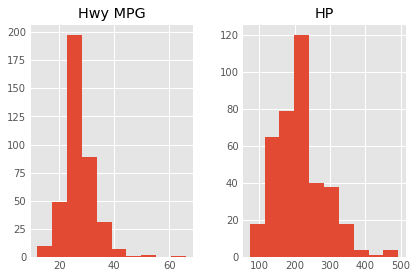

In [27]:
hist=cars.hist(column=['Hwy MPG', 'HP'])

If you specify no parameters for which column you get them all! In the example below, the figure is made larger so that the histograms don't overlap each other.

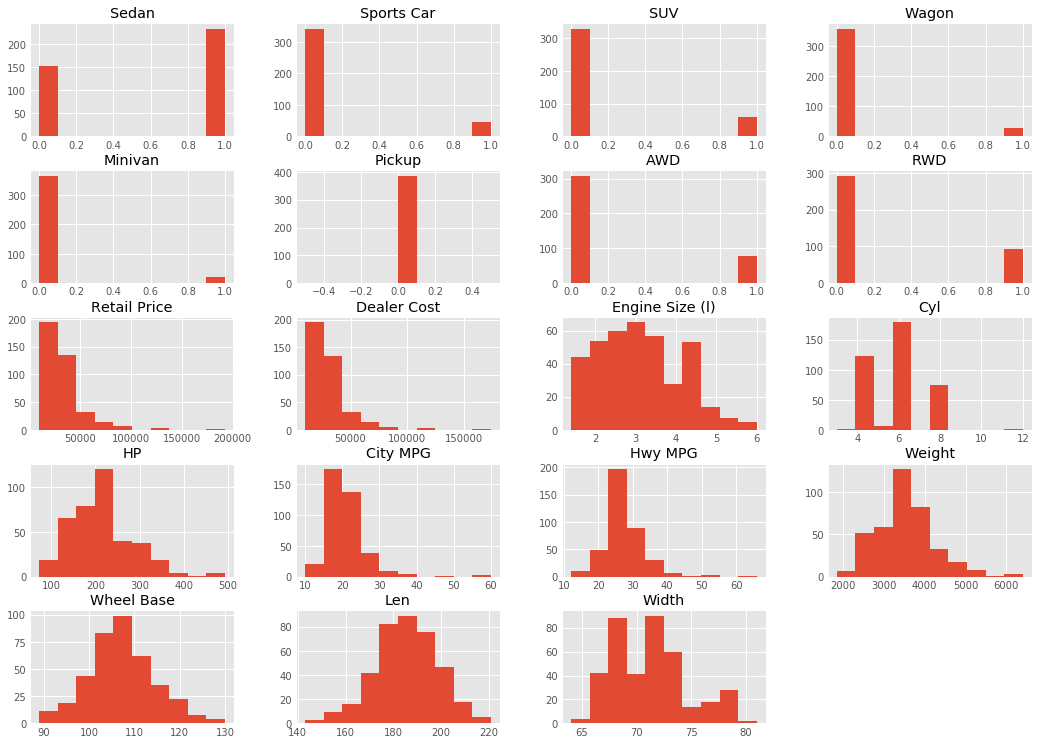

In [28]:
hist=cars.hist(figsize=(16,12))

You can customize the histogram by providing the hist() method additional parameters and matplotlib styling:

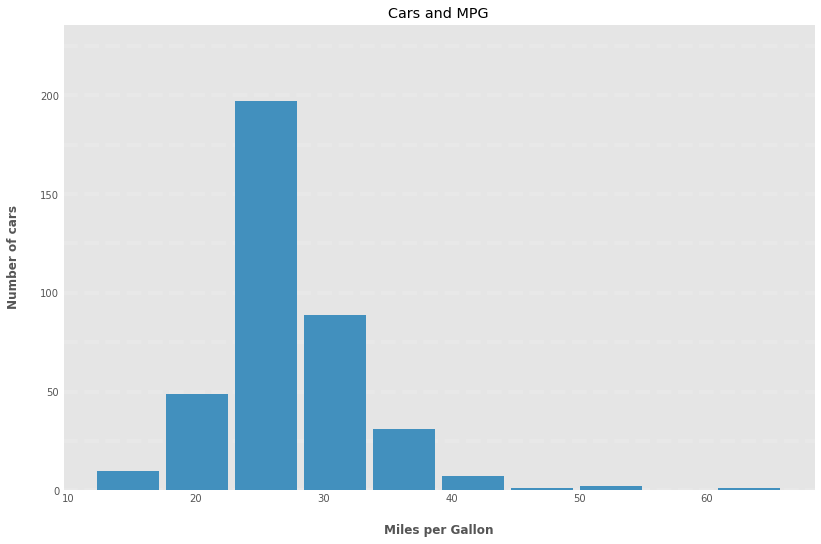

In [117]:
hist = cars.hist(column='Hwy MPG', bins=10, grid=False, figsize=(12,8), color='#4290be', zorder=2, rwidth=0.9)

hist = hist[0] # each unique value is accessed by its index (the car name) which is in clumn 0

for x in hist:

    # Switch off tickmarks
    x.tick_params(axis="both", which="both", bottom=False, top=True, labelbottom=True, left=False, right=False, labelleft=True)

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set title (set to "" for no title!)
    x.set_title("Cars and MPG")

    # Set x-axis label
    x.set_xlabel("Miles per Gallon", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of cars", labelpad=20, weight='bold', size=12)

# Exercises: Part 1

Refer to the examples above to guide you in completing the following exercises. You may need to do some research in the Pandas or Matplotlib documentation to help you out.

## Exercise 1

- Create a new dataframe that contains only the Name, Highway MPG rating, and Weight of each car in the dataset.
- Display the last 15 entries in the dataframe
- Use the new dataframe to create a bar chart that shows the number of cars for each MPG rating (e.g., there are 10 cars with an MPG of 32), with the values sorted in ascending order.

In [43]:
### Your code here
import pandas as pd

cars = pd.read_csv('data_cars_2004.csv')          # read csv file into a dataframe named 'cars'
columns = ['Vehicle Name', 'Hwy MPG', 'Weight']   # specify columns to keep
cars = cars[columns]                              # splice dataframe with desired columns
cars.tail(15)                                     # display last 15 entries in the dataframe

,Vehicle Name,Hwy MPG,Weight
372,Volkswagen Passat W8,25,4067
373,Volkswagen Passat W8 4MOTION 4dr,25,3953
374,Volkswagen Touareg V6,20,5086
375,Volvo C70 HPT convertible 2dr,26,3450
376,Volvo C70 LPT convertible 2dr,28,3450
377,Volvo S40 4dr,29,2767
378,Volvo S60 2.5 4dr,27,3903
379,Volvo S60 R 4dr,25,3571
380,Volvo S60 T5 4dr,28,3766
381,Volvo S80 2.5T 4dr,27,3691


#### Exercise 1: Create Bar Chart

matplotlib.axes._subplots.AxesSubplot

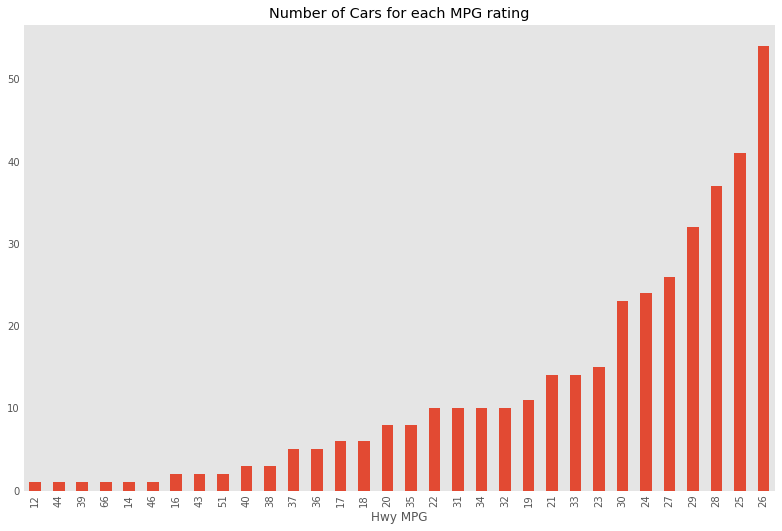

In [140]:
MPG_hist = pd.DataFrame(cars['Hwy MPG'].value_counts())          # Create dataframe with counted values
MPG_hist.index.names = ['Hwy MPG']                               # set index name 
MPG_hist = MPG_hist.rename(columns = {'Hwy MPG' : 'Count'})      # rename column 
MPG_sorted = MPG_hist.sort_values('Count', ascending = True).plot(kind = 'bar', legend = None, grid = False, figsize = (12,8), title ='Number of Cars for each MPG rating') # plot figure

## Exercise 2

- Create a table that shows the names of the top 10 heaviest cars.
- Make a new dataframe for only these 10 "heaviest".
- Create a horizontal bar chart that shows the top 5 "heaviest" in descending order, their labels and values. It should be sized at 10 x 8. The names of the vehicles should be shown to the left of the bars. Set the x and y labels to show "weight" and "Top 5 heaviest cars" (Hint: it may be easiest to do this with a new dataframe.)

In [172]:
### Your code here

import pandas as pd

cars = pd.read_csv('data_cars_2004.csv')                             # read csv file into a dataframe named 'cars'
car_lbs = cars.sort_values('Weight', ascending = False)              # sort dataframe by weight in descending order
heaviest_cars = car_lbs.iloc[0:10].reset_index(drop = True)          # Dataframe containing top 10 heaviest cars

#### Table of Heaviest Cars

In [174]:
heaviest_cars['Vehicle Name']              # Table showing names of the top 10 heaviest cars

0                     Hummer H2
1         GMC Yukon XL 2500 SLT
2      Lincoln Navigator Luxury
3                  Lexus LX 470
4            Mercedes-Benz G500
5           Toyota Land Cruiser
6    Land Rover Range Rover HSE
7            Cadillac Escaladet
8            Toyota Sequoia SR5
9         Volkswagen Touareg V6
Name: Vehicle Name, dtype: object

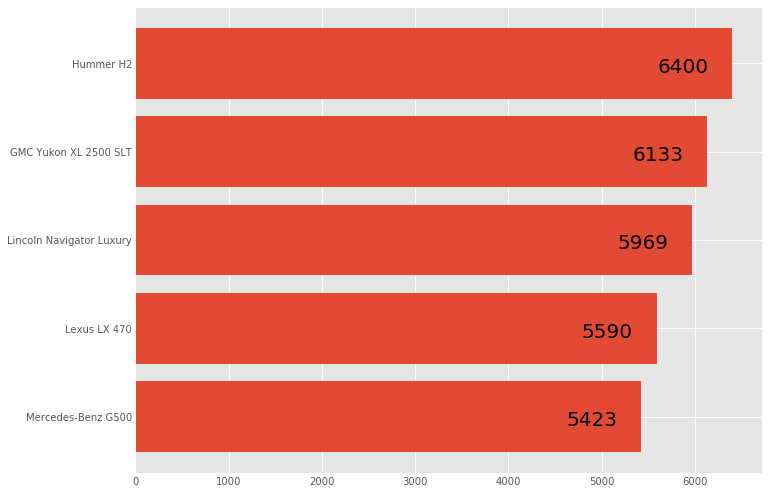

In [250]:
top_five_heaviest = heaviest_cars[0:5]                                     # splice top five heaviest cars from dataframe
labels = top_five_heaviest['Weight'].values.tolist()                       # create labels for bar chart

fig, ax = plt.subplots(figsize = (10,8))                                   # create figure
ax.barh('Vehicle Name', 'Weight', data = top_five_heaviest)                # create horizontal bar chart
ax.invert_yaxis()                                                          # sort in descending order

i = 0
for label in labels:                                                       # add labels
    ax.text(label - 800, i + .1, label, fontsize = 20)
    i = i+1

## Exercise 3

Flex your skills! Create your own arbitrary chart from any of the values in the Cars dataset. Document your approach in the markdown cells. Cite any external references.

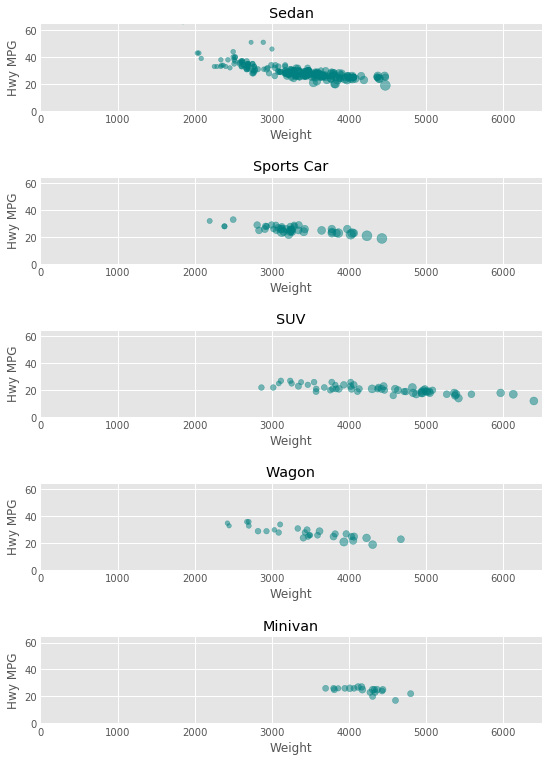

In [361]:
### Your code here
import pandas as pd

cars = pd.read_csv('data_cars_2004.csv')
columns = ['Vehicle Name', 'Sedan', 'Sports Car', 'SUV', 'Wagon', 'Minivan', 'Weight', 'Hwy MPG', 'HP']
cars = cars[columns]

body_types = ['Sedan', 'Sports Car', 'SUV', 'Wagon', 'Minivan']

byBodyDict = {} 

fig, axs = plt.subplots(5,figsize = (8,12))
plt.subplots_adjust(hspace = 0.75)

i = 0

for body in body_types:
    temp_df = cars[cars[body] == 1]
    temp_df = temp_df.replace(0,np.nan).dropna(axis = 1)
    byBodyDict[body] = temp_df
    axs[i].scatter(byBodyDict[body]['Weight'], byBodyDict[body]['Hwy MPG'], s = byBodyDict[body]['HP']/5, alpha = 0.5, c = 'teal')
    axs[i].set_title(body)
    axs[i].set_xlim([0, 6500])
    axs[i].set_ylim([0,65])
    axs[i].set_ylabel('Hwy MPG')
    axs[i].set_xlabel('Weight')
    i = i+1

# Exercises: Part 2
Make sure that the lab file `Sample-Superstore-Orders.csv` is stored in your notebook before continuing with the following exercises.

In Exercises 4-6, we'll use the Superstore Data we saw in the Tableau data cleaning exercises to create visualizations.

## Exercise 4

Use the source data to create a histogram of the distribution of Sales in Illinois. Use your own judgement as to how to style and present the chart.

In [62]:
### Your code here
import pandas as pd

df = pd.read_csv('Sample-Superstore-Orders.csv')
illinois_df = df[df['State'] == 'Illinois']

Text(0, 0.5, 'Number of Sales')

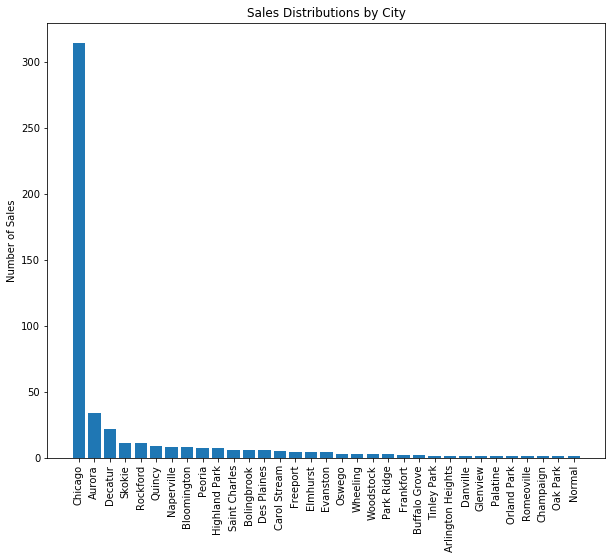

In [65]:
import matplotlib.pyplot as plt
counts = pd.DataFrame(illinois_df['City'].value_counts())
fig, ax = plt.subplots(figsize = (10,8))

ax.bar(counts.index, counts['City'])                
plt.xticks(rotation = 90)
plt.title('Sales Distributions by City')
plt.ylabel('Number of Sales')


## Exercise 5

Use the source data to create a time series of Sales data for Illinois, New York, and California. Your visualization should show data for all three states in the same chart. Use your own judgement as to how to style and present the chart.

In [209]:
### Your code here

ca = df[df['State'] == 'California'][['Order Date', 'Sales']].groupby('Order Date').sum()
ca.index = pd.to_datetime(ca.index)
ca = ca.sort_index()
ca = ca.rename(columns = {'Sales' : 'CA'})

ny = df[df['State'] == 'New York'][['Order Date', 'Sales']].groupby('Order Date').sum()
ny.index = pd.to_datetime(ny.index)
ny = ny.sort_index()
ny = ny.rename(columns = {'Sales' : 'NY'})

il = df[df['State'] == 'Illinois'][['Order Date', 'Sales']].groupby('Order Date').sum()
il.index = pd.to_datetime(il.index)
il = il.sort_index()
il = il.rename(columns = {'Sales' : 'IL'})


data = pd.concat([ca, ny, il], axis = 1).resample('M').sum()
dates = data.index.strftime('%m-%Y').tolist()

In [225]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.palettes import Paired6
from math import pi

output_notebook()

states = ['CA', 'NY', 'IL']
colors = [Paired6[1], Paired6[3], Paired6[5]]
source = {'months' : dates,
         'CA' : data['CA'].values.tolist(),
         'NY' : data['NY'].values.tolist(),
         'IL' : data['IL'].values.tolist()}

p = figure(plot_height = 600, plot_width = 1200, title = 'Sales Volumes by State', toolbar_location = None, tools = "", x_range = dates)
p.vbar_stack(states, x = 'months', width = 0.9, color = colors, source = source, legend_label = states )
p.legend.location = 'top_left'
p.xaxis.major_label_orientation = pi/2
p.xgrid.visible = False
p.yaxis.axis_label = 'Total Monthly Sales ($)'
p.yaxis.axis_label_text_font_size = '20px'
p.xaxis.axis_label_text_font_size = '20px'
p.title.text_font_size = '24px'

show(p)

Loading BokehJS ...

## Exercise 6
Locate your own data file for the final exercise. It can be any .csv file from any source that you have access to or that is online. Check Canvas for a list of data sources. Use your source data to a new visualization. Explain your chart, including choice of dimensions, values, and encodings in comments or a markdown text box.

**Stretch Goal for one extra point: Create an additional visualization of a type that we did not cover in class. (e.g., bar chart, box plot, etc.)**

In [242]:
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.palettes import RdYlGn4
import datetime
from math import pi

# Load HPWH data file, set index to datetime type
HPWH_data = pd.read_csv('HPWH_data.csv', parse_dates = True, index_col = 'Datetime')
HPWH_data.index = pd.to_datetime(HPWH_data.index)
HPWH_data.head()

,HPWH Heat,LLSC TT1:,LLSC TT3:
Datetime,,,
2020-08-15 00:00:03+00:00,0.0,118.6,106.69
2020-08-15 00:00:13+00:00,0.0,118.6,106.69
2020-08-15 00:00:23+00:00,0.0,118.6,106.69
2020-08-15 00:00:33+00:00,0.0,118.6,106.69
2020-08-15 00:00:43+00:00,0.0,118.4,106.02


### Hybrid Heat Pump Water Heater (HPWH) Study
_Heat Pump Water Heaters (HPWH) are a technology that have been identified as a key technology to decarbonization of the building sector (see https://www.energy.gov/energysaver/water-heating/heat-pump-water-heaters)_

__Hybrid System Background__

Hybrid systems utilize gas heating for redundancy, peak heating, and temperature maintenance - and are typically designed for 80% electric / 20% gas heating contributions. This time series data is from my Environmental Defense Fund fellowship hosted at Bright Power, where I investigated hybrid HPWH systems and their potential for accelerating HPWH market adaptation. It is for a hybrid HPWH domestic hot water system at an affordable multifamily property in the Tenderloin district of San Francisco.    
  
--- 


__CSV Contents and governing equations__  

The csv file (HPWH_data.csv) contains three variables:  


- "HPWH Heat" is the heating in btu/h that the heat pump provides
- "LLSC TT1:" is a temperature sensor on the inlet of the gas boiler
- "LLSC TT3:" is a temperature sensor on the outlet of the gas boiler  


Gas Heat is calculated using 
>Q = 500.4 * flow_rate * delta T 

where: delta T = (LLSC TT3 - LLSC TT1), and flow_rate of the boiler pump is assumed constant at 68 gpm  
  
  
---

##### Filtering errant data
Gas Heat (Q) values that < 0 are assumed to be errant, and the boiler is assumed to be off. These values are filtered out and set to zero.  

In [248]:
"""
This code will take the HPWH_data.csv file, calculate gas heating, calculate total heating, and find % Heating Contributions from Gas/Electric
A visualization will be created that shows a normalized, stacked bar chart that shows % Heating Contribution from the two sources on a day-by-day basis

"""

# specify assumed pump flow
pump_flow = 68

# calculate gas heating value
HPWH_data['Gas Heat'] = 500.4 * pump_flow * (HPWH_data['LLSC TT3:'] - HPWH_data['LLSC TT1:'])

# filter bad (negative) gas heating values and set to zero
HPWH_data['Gas Heat'][HPWH_data['Gas Heat'] < 0] = 0

# Create Column for Total Heating, HPWH %, and Gas %
HPWH_data['Total Heating'] = HPWH_data['Gas Heat'] + HPWH_data['HPWH Heat']
HPWH_data['HPWH %'] = 100 * HPWH_data['HPWH Heat'] / HPWH_data['Total Heating']
HPWH_data['Gas %'] = 100 - HPWH_data['HPWH %']

# Find average Heating Contribution % for each day
HPWH_data_day = HPWH_data.groupby(HPWH_data.index.date).mean().dropna()

#### Plotting

In [249]:
# Create x-axis datelist values for plotting
days = HPWH_data_day.index
datelist = []

for day in days:
    datelist.append(day.strftime('%m/%d'))

# specify categories, colors, and data source for plotting
types = ['HPWH', 'GAS']
colors = [RdYlGn4[0], RdYlGn4[3]]

source = {'days' : datelist,
         'HPWH' : HPWH_data_day['HPWH %'].values.tolist(),
         'GAS' : HPWH_data_day['Gas %'].values.tolist()}

output_notebook()

# Invoke vbar plot commands
p = figure(x_range = datelist, y_range = (0,100), plot_height = 400, plot_width = 1000, title = '% Heating Contribution', toolbar_location = None, tools ="")
p.vbar_stack(types, x = 'days', width = 0.9, color = colors, source = source, legend_label = types, fill_alpha = [.75, .6])

# stylize plot
p.xaxis.major_label_orientation = pi/2
p.ygrid.visible = True
p.xgrid.visible = False
p.ygrid.grid_line_color = 'grey'
p.ygrid.grid_line_alpha = 1
p.yaxis.axis_label = '% Contribution'
p.yaxis.axis_label_text_font_size = "16px"
p.xaxis.major_label_text_font_size = "16px"
p.yaxis.major_label_text_font_size = "16px"
p.title.text_font_size = "25px"

show(p)

Loading BokehJS ...